In [1]:
from dramkit import plot_series
from finfactory.load_his_data import load_index_joinquant
from finfactory.fintools.utils_chn import merge_minute_candle
from finfactory.finplot.plot_candle import plot_candle
import finfactory.fintools.fintools as fintools

In [2]:
df1 = load_index_joinquant('000300.XSHG', '1min')
# df5 = merge_minute_candle(df1, 5, ['volume', 'money'])
# df15 = merge_minute_candle(df1, 15, ['volume', 'money'])
df30 = merge_minute_candle(df1, 30, ['volume', 'money'])

function `merge_minute_candle` run time: 52.380399s.


In [3]:
# print('df1.shape', df1.shape)
# print('df5.shape', df5.shape)
# print('df15.shape', df15.shape)
print('df30.shape', df30.shape)

df30.shape (33536, 7)


In [4]:
df = df30.set_index('time')

In [6]:
df['ma_slow'] = df['close'].rolling(30).mean()
df['ma_fast'] = df['close'].rolling(15).mean()
df['f'] = df['ma_fast'] / df['ma_slow'] - 1

df['turn'] = fintools.get_turn_point(df['f'])
df['bbw'] = fintools.bbw(df)

df.tail()

,open,close,high,low,volume,money,ma_slow,ma_fast,f,turn,mid,std,bbw
time,,,,,,,,,,,,,
2022-07-06 11:30:00,4438.4831,4432.9146,4447.2784,4428.8699,1.171250e+09,2.557698e+10,4469.742677,4469.268687,-0.000106,0,4470.162460,18.339980,0.008264
2022-07-06 13:30:00,4432.8091,4425.1725,4438.1614,4418.7301,1.252349e+09,2.959036e+10,4467.554760,4465.827520,-0.000387,0,4469.441915,19.533070,0.008813
2022-07-06 14:00:00,4425.0324,4410.0300,4432.7030,4408.7620,1.301304e+09,2.866693e+10,4465.055427,4461.038853,-0.000900,0,4467.212035,21.911302,0.009903
2022-07-06 14:30:00,4409.7283,4403.6930,4414.1787,4393.4165,1.832245e+09,3.801872e+10,4463.167193,4454.883053,-0.001856,0,4464.633950,25.400349,0.011520
2022-07-06 15:00:00,4404.8058,4423.9698,4425.4342,4400.1983,1.695264e+09,3.838664e+10,4461.441187,4449.979707,-0.002569,0,4461.881240,28.712225,0.013037


In [7]:
for k in range(1, 101):
    print(k, fintools.cal_ic(df, 'f', lag=k))

1 0.022258338928800907
2 0.02203265059361272
3 0.023311992438783933
4 0.02073756303829168
5 0.022147057177292533
6 0.02167474715519133
7 0.023437163095345537
8 0.025444958159354002
9 0.028708088691901855
10 0.032471558478476915
11 0.03654895904649579
12 0.04018164856933398
13 0.04331603527858262
14 0.0457913271647291
15 0.048341940107474404
16 0.05057875100328019
17 0.05214222259504705
18 0.05282112285411865
19 0.053796140478459695
20 0.05490234442122523
21 0.055511893056269634
22 0.05551514674000466
23 0.055389279543794155
24 0.054924237637909636
25 0.054301609747779235
26 0.05307999739935549
27 0.05121817053548178
28 0.049053998697060286
29 0.046363752104132905
30 0.043693377243343594
31 0.041221899008116916
32 0.03865206161503569
33 0.03628446980546884
34 0.033900942364546285
35 0.031711823605308366
36 0.02980237723090785
37 0.028266603653370123
38 0.027225006568833254
39 0.026541498027967996
40 0.026236539205594968
41 0.02618449582946299
42 0.02658088557797593
43 0.0271165380210597

In [8]:
f_up = df['f'].quantile(0.95)
f_low = df['f'].quantile(0.05)
print(f_up, f_low)

0.014871917061717733 -0.015242310422746519


In [17]:
df['atr'], _ = fintools.atr(df)
df['atr_low'] = df['close'] - 0.2*df['atr']
df['atr_high'] = df['close'] + 0.2*df['atr']

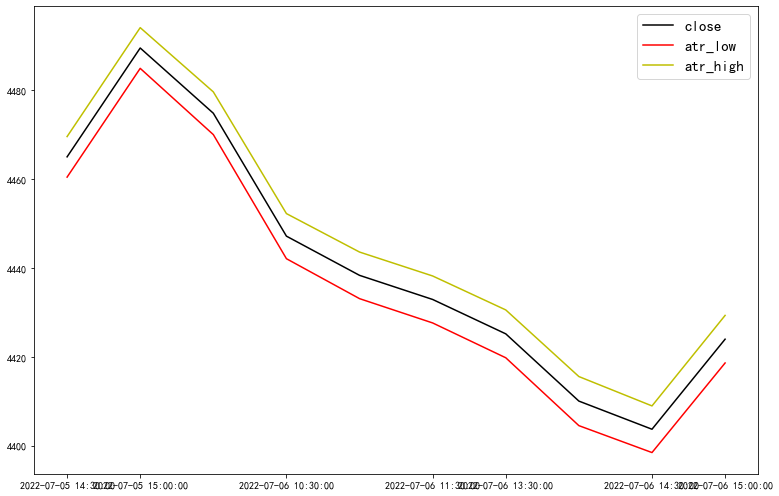

In [21]:
N = 10
plot_series(df.iloc[-N:, :],
            cols_styl_up_left={
                'close': ('-k', None),
                'atr_low': ('-r', None),
                'atr_high': ('-y', None)
#                 'ma_fast': ('-r', None),
#                 'ma_slow': ('-y', None)
            },
#             cols_styl_up_right={'f': ('-b', None), 'bbw': ('-g', None)},
#             cols_to_label_info={'close': [['turn', (-1, 1), ('r^', 'gv'), ('low', 'high')]]},
#             xparls_info={'f': [(0,), (f_up,), (f_low,)]},
            n_xticks=6)